<a href="https://colab.research.google.com/github/AdolfoBanchio/Redes-neuronales-2024/blob/main/guias_ejercicios/redes_neuronales_2024_guia_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch: Aprendiendo Fashion-MNIST

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [1]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict
from tqdm import tqdm

In [3]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
#import dill
import json

In [4]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [5]:
# 1.4)
""" import google.colab
from google.colab import files """

' import google.colab\nfrom google.colab import files '

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores al rango [0,1]) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [6]:
# 2.1)
# get the MNIST dataset from pytorch
transformer = transforms.ToTensor()
fashion_dataset = datasets.FashionMNIST(root='./data/fashion/',train=True, download=True, transform=transformer)

validation_dataset = datasets.FashionMNIST(root='./data/fashion/',train=False, download=True, transform=transformer)

In [7]:
print(validation_dataset.data.shape)
print(validation_dataset.targets.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [8]:
print(fashion_dataset.__getitem__(0),type(fashion_dataset.__getitem__(0)))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [9]:
fashion_categories = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8:	"Bag",
    9:	"Ankle boot"
}

In [10]:
print(fashion_dataset.data[0])
print(fashion_dataset.targets[0:9].detach().numpy())

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

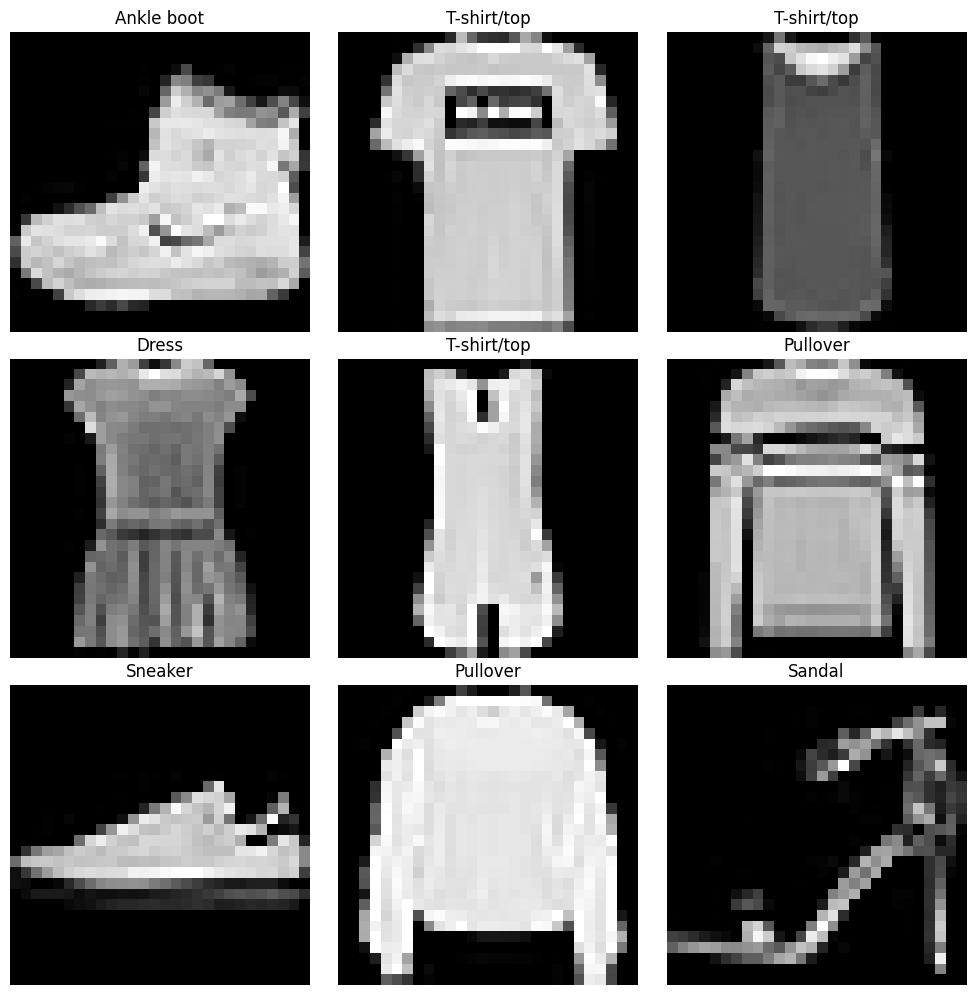

In [11]:
sample_clothes = fashion_dataset.data[0:9]
sample_labels = fashion_dataset.targets[0:9].detach().numpy()

fig, axes = plt.subplots(3,3,figsize=(10,10))
for i in range(3):
  for j in range(3):
    axes[i][j].imshow(sample_clothes[3*i+j],cmap='gray')
    axes[i][j].set_title(fashion_categories[sample_labels[3*i+j]])
    axes[i][j].axis('off')
    plt.tight_layout()
plt.show()


## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [12]:
# 3.1)
# create the dataloader from the fashion MNIST dataset
fashion_dataloader = DataLoader(fashion_dataset,batch_size=100, shuffle=True)

In [13]:
for images, labels in fashion_dataloader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 1, 28, 28])
torch.Size([100])


## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [14]:
# 4)
class FashionMNISTClassifier(nn.Module):
  def __init__(self, n1,n2, dropout_val=0.2):
    super(FashionMNISTClassifier, self).__init__()
    self.flatten = nn.Flatten()
    self.full_connected_1 = nn.Linear(28*28,n1)
    self.full_connected_2 = nn.Linear(n1,n2)
    self.output = nn.Linear(n2,10)

    # define activation funtion and dropout
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(dropout_val)

  def forward(self, x):
    # first flatten the input image
    x = self.flatten(x)

    # forward to the first hidden layer
    x = self.relu(self.full_connected_1(x))
    x = self.dropout(x)

    # forward to the second hidden layer
    x = F.relu(self.full_connected_2(x))
    x = self.dropout(x)

    # forward to the output layer
    x = self.output(x)
    return x



## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [15]:
def train_batches_fashionMNIST_classifier(model, train_loader, optimizer, criterion):
  """
  Trains the model for all the batches in train_loader

  Returns:
  - avg entropy loss
  - avg accuracy
  """
  train_total_entropy_loss = 0
  train_total_accuracy = 0
  model.train()
  for images, labels in train_loader:
    optimizer.zero_grad()
    pred = model(images)
    loss = criterion(pred, labels)
    loss.backward()
    optimizer.step()
    train_total_entropy_loss += loss.item()
    train_total_accuracy += (pred.argmax(1) == labels).type(torch.float).sum().item()

  return train_total_entropy_loss/len(train_loader), train_total_accuracy/len(train_loader.dataset)


In [16]:
def valid_batches_fashionMNIST_classifier(model, valid_loader, criterion):
  validation_entropy_loss = 0
  validation_accuracy = 0
  model.eval()
  with torch.no_grad():
    for images, labels in valid_loader:
      pred = model(images)
      loss = criterion(pred, labels)
      validation_entropy_loss += loss.item()
      validation_accuracy += (pred.argmax(1) == labels).type(torch.float).sum().item() # calculate the accuracy of batch

  return validation_entropy_loss/len(valid_loader), validation_accuracy/len(valid_loader.dataset)

In [17]:
def train_fashionMNIST_classifier(model, train_loader, valid_loader, optimizer, criterion, epochs):
  train_entropy_loss = []
  valid_entropy_loss = []
  train_accuracy = []
  valid_accuracy = []
  for epoch in tqdm(range(epochs)):

    # train one epoch
    train_entropy, train_acc = train_batches_fashionMNIST_classifier(model, train_loader, optimizer, criterion)
    train_entropy_loss.append(train_entropy)
    train_accuracy.append(train_acc)

    # validate the epoch
    valid_entropy, valid_acc = valid_batches_fashionMNIST_classifier(model, valid_loader, criterion)
    valid_entropy_loss.append(valid_entropy)
    valid_accuracy.append(valid_acc)

  return train_entropy_loss, valid_entropy_loss, train_accuracy, valid_accuracy

In [18]:
learning_rate = 1e-3
dropout = 0.2
n1 = 128 # 1st hidden layer neurons
n2 = 64 # 2nd hidden layer neurons
epochs = 100
batches_size = 100

In [19]:
fashion_model = FashionMNISTClassifier(n1,n2,dropout)

# choose where the model executes
fashion_model.cpu()
#fashion_model.cuda()
print(fashion_model)

FashionMNISTClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (full_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (full_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(fashion_model.parameters(), lr=learning_rate)

In [21]:
train_loader = DataLoader(fashion_dataset,batch_size=batches_size, shuffle=True)
valid_loader = DataLoader(validation_dataset,batch_size=batches_size, shuffle=True)

In [22]:
#train_entropy_loss,valid_entropy_loss, train_accuracy,valid_accuracy = train_fashionMNIST_classifier(fashion_model, train_loader, valid_loader, optimizer, criterion, epochs)

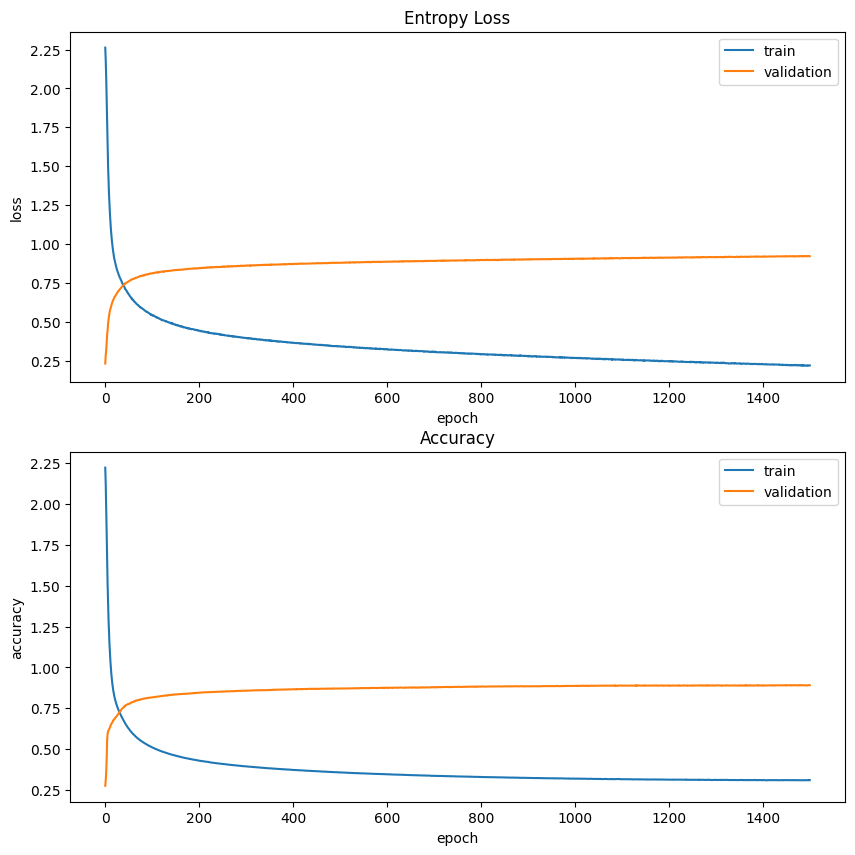

In [47]:
# read the results from the file
with open('./results/conf_1_results.json','r') as f:
    results = json.load(f)
    train_loss = np.array(results['train_loss'])
    valid_loss = np.array(results['valid_loss'])
    train_accuracy = np.array(results['train_accuracy'])
    valid_accuracy = np.array(results['valid_accuracy'])

# plot the results
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(train_loss, label='train')
plt.plot(valid_loss, label='validation')
plt.title('Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(2,1,2)
plt.plot(train_accuracy, label='train')
plt.plot(valid_accuracy, label='validation')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [ ]:
# load the model from ./models/conf_1.pt
model = torch.load('./models/conf_1.pt', weights_only=False)
model.eval()

# test the model with 500 samples
correct = 0
with torch.no_grad():
    for i in tqdm(range(validation_dataset.data.shape[0])):
        img, label = validation_dataset[i]
        pred = model(img.unsqueeze(0))
        correct += (pred.argmax().item() == label)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:17<00:00, 128.58it/s]

Accuracy: 17.824


In [64]:
print(f'Accuracy: {correct/validation_dataset.data.shape[0]}')

Accuracy: 0.8912


In [65]:
!python3 guia_12.py

Training configuration: conf_1
Parameters: {'learning_rate': 0.001, 'dropout': 0.2, 'n1': 128, 'n2': 64, 'epochs': 30, 'batches_size': 100}
2024-11-15 20:23:06,752 - DEBUG - Starting training with params: {'learning_rate': 0.001, 'dropout': 0.2, 'n1': 128, 'n2': 64, 'epochs': 30, 'batches_size': 100}
  0%|                                                    | 0/30 [00:08<?, ?it/s]
Traceback (most recent call last):
  File "/home/adolfo-banchio/.pyenv/versions/3.10.14/envs/LCC/lib/python3.10/site-packages/PIL/Image.py", line 459, in _getencoder
    encoder = ENCODERS[encoder_name]
KeyError: 'raw'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/adolfo-banchio/Documents/Facultad-LCC/Redes-neuronales-2024/Trabajo Practico 2/guia_12.py", line 98, in <module>
    model, train_loss_inc, train_loss, valid_loss, train_acc_inc, train_acc, valid_acc = train_model(conf_params, fashion_dataset, validation_dataset)
  File "/home/a